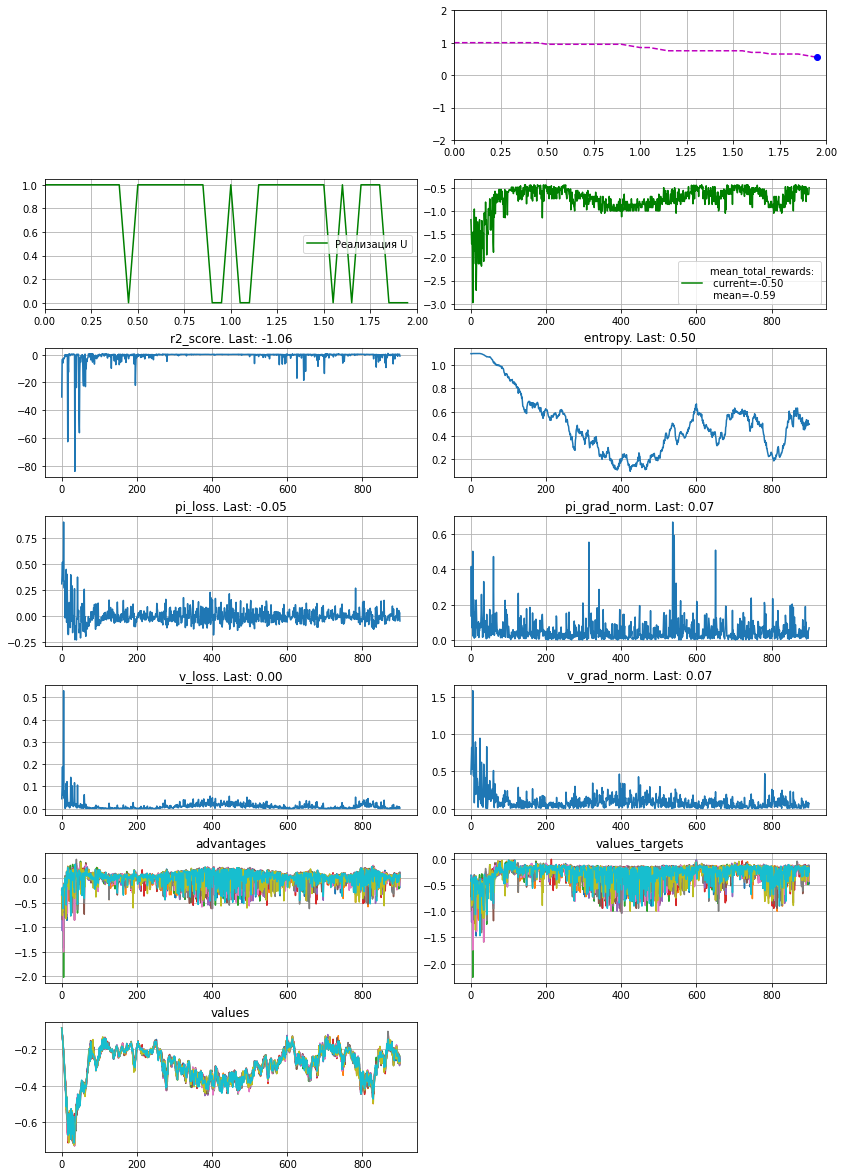

defaultdict(list, {})

In [3]:
import os, sys
sys.path.insert(0, os.path.abspath('..'))
import numpy as np
import torch.nn as nn
from Agents.Utilities.SequentialNetwork import SequentialNetwork
from Agents.Utilities.DiscreteActorCritic import DiscreteActorCritic
from Agents.PPO import PPO_Discrete
from Environments.SimpleControlProblem.SimpleControlProblem import SimpleControlProblem
from Agents.Utilities.ContinuousAgentMakers.ContinuousAgentMaker import  ContinuousAgentMaker
from Environments.SimpleControlProblem.SimpleControlProblemVisualizer import SimpleControlProblemVisualizer
import Solvers.PolicySolver as solver
%load_ext autoreload
%autoreload 2


#environment initialization
env = SimpleControlProblem()
action_n = 3
action_values = np.linspace(env.action_min, env.action_max, num=action_n)

#agent initialization
pi_model = SequentialNetwork([env.state_dim, 32, action_n], nn.ReLU())
v_model = SequentialNetwork([env.state_dim, 32, 1], nn.ReLU())
PPO = ContinuousAgentMaker(PPO_Discrete)
agent = PPO(
    # ac,
    pi_model,
    v_model,
    action_values=action_values,
    batch_size=10,
    epochs=5,
    clip_epsilon=.1,
    value_loss_coefficient=0.5,
    entropy_bonus_coefficient=0
)

#learning
visualizer = SimpleControlProblemVisualizer(waiting_for_show=100)
solver.go(
    env,
    agent,
    episode_n=1000,
    show=visualizer.show,
    session_len=40,
    session_n=1,
)
